In [1]:
# TensorFlow и tf.keras
import tensorflow as tf
from tensorflow import keras

# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


## Загружаем датасет Fashion MNIST

Это руководство использует датасет [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) который содержит 70,000 монохромных изображений в 10 категориях. На каждом изображении содержится по одному предмету одежды в низком разрешении (28 на 28 пикселей):

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist"> Образцы Fashion-MNIST</a> (Zalando, лицензия MIT).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST предназначен для замены классического датасета [MNIST](http://yann.lecun.com/exdb/mnist/) который часто используют как "Hello, World" программ машинного обучения для компьютерного зрения. Датасет MNIST содержит изображения рукописных цифр (0, 1, 2, и т.д.) в формате идентичном формату изображений одежды которыми мы будем пользоваться здесь.

Это руководство для разнообразия использует Fashion MNIST, и еще потому, что это проблема немного сложнее чем обычный MNIST. Оба датасета относительно малы, и используются для проверки корректности работы алгоритма. Это хорошие отправные точки для тестирования и отладки кода.

Мы используем 60,000 изображений для обучения нейросети и 10,000 изображений чтобы проверить, насколько правильно сеть обучилась их классифицировать. Вы можете получить доступ к Fashion MNIST прямо из TensorFlow. Импортируйте и загрузите данные Fashion MNIST прямо из TensorFlow:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


Загрузка датасета возвращает четыре массива NumPy:

* Массивы `train_images` и `train_labels` являются *тренировочным сетом* — данными, на которых модель будет обучаться.
* Модель тестируется на *проверочном сете*, а именно массивах `test_images` и `test_labels`.

Изображения являются 28х28 массивами NumPy, где значение пикселей варьируется от 0 до 255. *Метки (labels)* - это массив целых чисел от 0 до 9. Они соответствуют *классам* одежды изображенной на картинках:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому изображению соответствует единственная метка. Так как *названия классов* не включены в датасет, сохраним их тут для дальнейшего использования при построении изображений:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Изучите данные

Давайте посмотрим на формат данных перед обучением модели. Воспользовавшись shape мы видим, что в тренировочном датасете 60,000 изображений, каждое размером 28 x 28 пикселей:

In [5]:
train_images.shape

(60000, 28, 28)

Соответственно, в тренировочном сете 60,000 меток:

In [6]:
len(train_labels)

60000

Каждая метка это целое число от 0 до 9:

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проверочный сет содержит 10,000 изображений, каждое - также 28 на 28 пикселей:

In [8]:
test_images.shape

(10000, 28, 28)

И в проверочном сете - ровно 10,000 меток:

In [9]:
len(test_labels)

10000

## Предобработайте данные

Данные должны быть предобработаны перед обучением нейросети. Если вы посмотрите на первое изображение в тренировочном сете вы увидите, что значения пикселей находятся в диапазоне от 0 до 255:

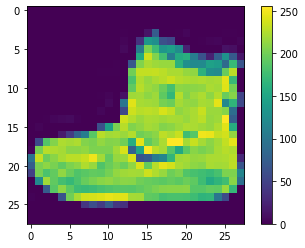

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Мы масштабируем эти значения к диапазону от 0 до 1 перед тем как скормить их нейросети. Для этого мы поделим значения на 255. Важно, чтобы *тренировочный сет* и *проверочный сет* были предобработаны одинаково:

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Чтобы убедиться, что данные в правильном формате и мы готовы построить и обучить нейросеть, выведем на экран первые 25 изображений из *тренировочного сета* и отобразим под ними наименования их классов.

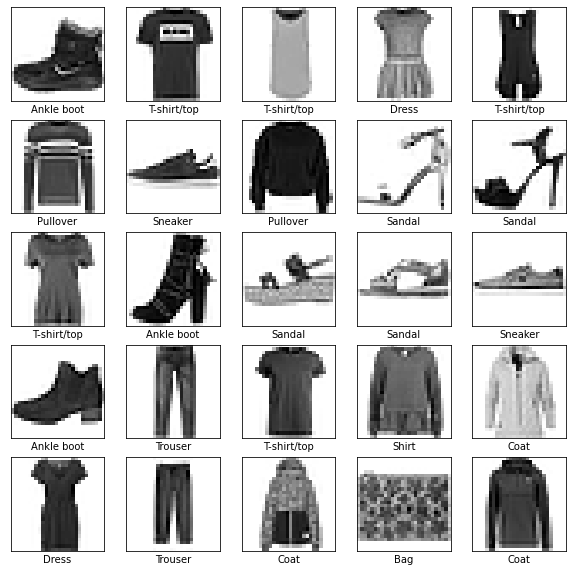

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Постройте модель

Построение модели нейронной сети требует правильной конфигурации каждого слоя, и последующей компиляции модели.

### Настройте слои

Базовым строительным блоком нейронной сети является *слой*. Слои извлекают образы из данных, которые в них подаются. Надеемся, что эти образы имеют смысл для решаемой задачи.

Большая часть глубокого обучения состоит из соединения в последовательность простых слоев. Большинство слоев, таких как tf.keras.layers.Dense, имеют параметры, которые настраиваются во время обучения.

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Первый слой этой сети - `tf.keras.layers.Flatten`, преобразует формат изображения из двумерного массива (28 на 28 пикселей) в одномерный (размерностью 28 * 28 = 784 пикселя). Слой извлекает строки пикселей из изображения и выстраивает их в один ряд. Этот слой не имеет параметров для обучения; он только переформатирует данные.

После разложения пикселей, нейросеть содержит два слоя `tf.keras.layers.Dense`. Это полносвязные нейронные слои. Первый `Dense` слой состоит из 128 узлов (или нейронов). Второй (и последний) 10-узловой *softmax* слой возвращает массив из 10 вероятностных оценок дающих в сумме 1. Каждый узел содержит оценку указывающую вероятность принадлежности изображения к одному из 10 классов.

### Скомпилируйте модель

Прежде чем модель будет готова для обучения, нам нужно указать еще несколько параметров. Они добавляются на шаге *compile* модели:

* *Функция потерь (Loss function)* — измеряет точность модели во время обучения. Мы хотим минимизировать эту функцию чтоб "направить" модель в верном направлении.
* *Оптимизатор (Optimizer)*  — показывает каким образом обновляется модель на основе входных данных и функции потерь.
* *Метрики (Metrics)* — используются для мониторинга тренировки и тестирования модели. Наш пример использует метрику *accuracy* равную доле правильно классифицированных изображений.

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Обучите модель

Обучение модели нейронной сети требует выполнения следующих шагов::

1. Подайте тренировочный данные в модель. В этом примере тренировочные данные это массивы `train_images` и `train_labels`.
2. Модель учится ассоциировать изображения с правильными классами.
3. Мы просим модель сделать прогнозы для проверочных данных, в этом примере массив test_images. Мы проверяем, соответствуют ли предсказанные классы меткам из массива test_labels.

Для начала обучения, вызовите метод `model.fit`, который называется так, поскольку "тренирует (fits)" модель на тренировочных данных:

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.4968 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.3758 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 2s 855us/step - loss: 0.3374 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.3128 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 2s 906us/step - loss: 0.2953 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 2s 977us/step - loss: 0.2826 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 2s 944us/step - loss: 0.2675 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2570 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2471 - accuracy: 0.9091
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step

В процессе обучения модели отображаются метрики потери (loss) и точности (accuracy). Эта модель достигает на тренировочных данных точности равной приблизительно 0.88 (88%).

## Оцените точность

Далее, сравните какую точность модель покажет на проверчном датасете:

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nТочность на проверочных данных:', test_acc)

313/313 - 0s - loss: 0.3271 - accuracy: 0.8867

Точность на проверочных данных: 0.8866999745368958


Полученная на проверочном сете точность оказалась немного ниже, чем на тренировочном. Этот разрыв между точностью на тренировке и тесте является примером *переобучения (overfitting)* . Переобучение возникает, когда модель машинного обучения показывает на новых данных худший результат, чем на тех, на которых она обучалась.

## Сделайте предсказания

Теперь, когда модель обучена, мы можем использовать ее чтобы сделать предсказания по поводу нескольких изображений:

In [17]:
predictions = model.predict(test_images)

Здесь полученная модель предсказала класс одежды для каждого изображения в проверочном датасете. Давайте посмотрим на первое предсказание:

In [18]:
predictions[0]

array([1.9520598e-08, 5.3213704e-08, 1.7727145e-09, 9.9466879e-09,
       2.9753721e-08, 8.0151400e-03, 1.3512318e-08, 1.3712936e-02,
       1.6969853e-08, 9.7827178e-01], dtype=float32)

Прогноз представляет из себя массив из 10 чисел. Они описывают "уверенность" (confidence) модели в том, насколько изображение соответствует каждому из 10 разных видов одежды. Мы можем посмотреть какой метке соответствует максимальное значение:

In [19]:
np.argmax(predictions[0])

9

Модель полагает, что на первой картинке изображен ботинок (ankle boot), или class_names[9]. Проверка показывает, что классификация верна:

In [20]:
test_labels[0]

9

Мы можем построить график, чтобы взглянуть на полный набор из 10 предсказаний классов.

In [21]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Давайте посмотрим на нулевое изображение, предсказание и массив предсказаний.

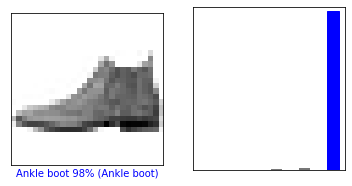

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

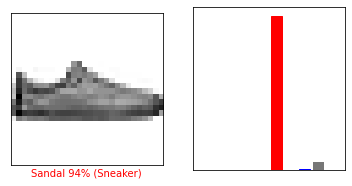

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Давайте посмотрим несколько изображений с их прогнозами. Цвет верных предсказаний синий, а неверных - красный. Число это процент уверенности (от 100) для предсказанной метки. Отметим, что модель может ошибаться даже если она очень уверена.

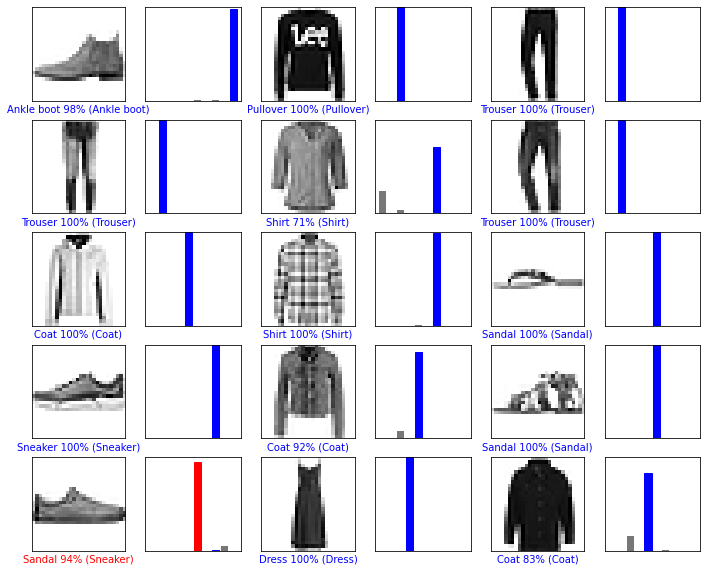

In [24]:
# Отображаем первые X тестовых изображений, их предсказанную и настоящую метки.
# Корректные предсказания окрашиваем в синий цвет, ошибочные в красный.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Наконец, используем обученную модель для предсказания класса на одном изображении.

In [25]:
# Берем одну картинку из проверочного сета.
img = test_images[0]

print(img.shape)

(28, 28)


Модели tf.keras оптимизированы для предсказаний на *пакетах (batch)* данных, или на множестве примеров сразу. Таким образом, даже если мы используем всего 1 картинку, нам все равно необходимо добавить ее в список:

In [26]:
# Добавляем изображение в пакет данных, состоящий только из одного элемента.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Сейчас предскажем правильную метку для изображения:

In [27]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.9520634e-08 5.3213704e-08 1.7727179e-09 9.9467261e-09 2.9753721e-08
  8.0151400e-03 1.3512318e-08 1.3712936e-02 1.6969853e-08 9.7827178e-01]]


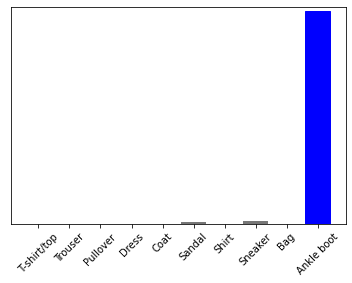

In [28]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

Метод `model.predict` возвращает нам список списков, по одному для каждой картинки в пакете данных. Получите прогнозы для нашего (единственного) изображения в пакете:

In [29]:
np.argmax(predictions_single[0])

9